In [1]:
import pandas as pd

activity = pd.read_csv('activity_log.csv')
activity.sort_values(by='userId')

,id,created_at,updated_at,activity,reference,expiry,userId
414,1451,2021-07-21 13:11:45.423759,2021-07-21 13:11:45.423759,Logged in,558ec2a15697c377f6abc8638fa906de,2022-07-21 19:11:45,1
378,1415,2021-07-12 20:54:53.452533,2021-07-12 20:54:53.452533,Logged in,84b17e62968faace55b700c1c4cb6303,2022-07-13 02:54:53,1
379,1416,2021-07-12 20:55:10.981237,2021-07-12 20:55:10.981237,Logged in,5897c06261b15542187f5734596472ab,2022-07-13 02:55:11,1
380,1417,2021-07-12 20:55:26.180709,2021-07-12 20:55:26.180709,No course selected. Navigating to course selec...,819a97a38b815ffd9c55f185339fa5ef,2022-07-13 02:55:26,1
385,1422,2021-07-13 14:42:37.668734,2021-07-13 14:42:37.668734,Logged in,d8c2e939c866403971b0368d0e4ff731,2022-07-13 20:42:38,1
...,...,...,...,...,...,...,...
382,1419,2021-07-13 11:05:07.614501,2021-07-13 11:05:07.614501,Enrolled onto Intro to .NET with C#,ee3d91fc8cb61fbd72be8fef9d8d7f5f,2022-07-13 17:05:08,131
395,1432,2021-07-14 09:28:15.573492,2021-07-14 09:28:15.573492,No course selected. Navigating to course selec...,a2de62065822bac2fc496b5393537a09,2022-07-14 15:28:16,131
394,1431,2021-07-14 09:28:00.435449,2021-07-14 09:28:00.435449,Updated password,5c3d41da0100d53482d9ee9d05c50f50,2022-07-14 15:28:00,131
392,1429,2021-07-14 09:27:50.593216,2021-07-14 09:27:50.593216,Logged in,a1777605dbaae3bbc832ef81a35aba71,2022-07-14 15:27:51,131


In [2]:
len(activity['userId'].unique())

26

### Exploring activites on the platform

In [3]:
activity['activity'].unique()

array(['Logged in',
       'Accessed Session 4 - Starter Files from Intro to Game Dev with Unity repo',
       'Accessed Session 3 Recap from Intro to Game Dev with Unity repo',
       'Accessed W3Schools from Intro to Web Dev repo',
       'No course selected. Navigating to course selection',
       'Accessed Session 1 Recap from Intro to Game Dev with Unity repo',
       'Accessed Session 3 Recap from Intro to Game Dev with Unity repo [access:5b3cf9ac46f::rrtGJAd2ae1e]',
       'Accessed Session 1 Recap - Write Up from Intro to Game Dev with Unity repo [access:74bc4bdc5d2::rrtGJAd2ae1e]',
       'Accessed Session 2 Recap from Intro to Game Dev with Unity repo [access:918a4f912a1::rrtGJAd2ae1e]',
       'Accessed Session 2 - Starter Files from Intro to Game Dev with Unity repo [access:1a82c08473b::rrtGJAd2ae1e]',
       'Accessed Session 3 - Starter Files from Intro to Game Dev with Unity repo [access:dd9df1d2f3c::rrtGJAd2ae1e]',
       'Accessed Session 5 - Starter Files from Intro t

In [4]:
activity['Activity Overview'] = activity['activity'].apply(lambda x: "Accessed a Session" if "Session" in x else x)

In [5]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Enrolled" if "Enrolled" in x else x)

In [6]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Pssword acivity" if "assword" in x else x)

In [7]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Created project" if "Created project" in x else x)

In [8]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Tested work" if "Tested" in x else x)

In [9]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Navigated course" if "Navigating" in x else x)

In [10]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Profile activity" if "profile" in x else x)

In [11]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Deleted project" if "Deleting project" in x else x)

In [12]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "Submitted assignment" if "Submitted assignment" in x else x)

In [13]:
activity['Activity Overview'] = activity['Activity Overview'].apply(lambda x: "External link" if "W3Schools" in x else x)

In [14]:
activity['Activity Overview'].value_counts(dropna=False)

Logged in               324
Accessed a Session       59
Magic link sent          29
Pssword acivity          28
Navigated course         16
Enrolled                 15
Tested work               3
Created project           2
Profile activity          2
Submitted assignment      1
Deleted project           1
External link             1
Name: Activity Overview, dtype: int64

In [15]:
activity_count_df = activity['Activity Overview'].value_counts().to_frame(name="Number of records").reset_index().rename({'index':'Activity name'}, axis = 'columns')
activity_count_df

,Activity name,Number of records
0,Logged in,324
1,Accessed a Session,59
2,Magic link sent,29
3,Pssword acivity,28
4,Navigated course,16
5,Enrolled,15
6,Tested work,3
7,Created project,2
8,Profile activity,2
9,Submitted assignment,1


In [16]:
import plotly.express as px
fig = px.pie(activity_count_df, values='Number of records', names='Activity name', title='Activities on the Project Function Platform')
fig.show()

### Comparing the popularity of activites without Logged in

In [17]:
activities_without_login = activity_count_df[activity_count_df['Activity name']!= 'Logged in']
fig = px.bar(activities_without_login,
            x= 'Activity name',
            y= 'Number of records',
            hover_data=['Activity name'], color='Number of records',
            title='Activities on the Project Function Platform')

fig.show()

In [18]:
activity

,id,created_at,updated_at,activity,reference,expiry,userId,Activity Overview
0,1028,2021-03-25 11:25:05.219531,2021-03-25 11:25:05.219531,Logged in,fb90e519c1d230f016d3a5d95f005f77,2022-03-25 17:25:05,106,Logged in
1,1029,2021-03-25 11:25:36.764022,2021-03-25 11:25:36.764022,Accessed Session 4 - Starter Files from Intro ...,6303bac7a4c38503cbbfab8aaaf12840,2022-03-25 17:25:37,106,Accessed a Session
2,1030,2021-03-25 11:28:19.047747,2021-03-25 11:28:19.047747,Accessed Session 3 Recap from Intro to Game De...,fc6ffe47d3cc201a1bd83b35ed8cb419,2022-03-25 17:28:19,106,Accessed a Session
3,1031,2021-03-25 15:58:27.461204,2021-03-25 15:58:27.461204,Logged in,ac290f99744baf85c1eb7d8432dfd354,2022-03-25 21:58:27,3,Logged in
4,1032,2021-03-25 16:00:34.020002,2021-03-25 16:00:34.020002,Accessed W3Schools from Intro to Web Dev repo,4dfb37feb52f7512e515e7845d087fe0,2022-03-25 22:00:34,3,External link
...,...,...,...,...,...,...,...,...
476,1521,2022-02-24 14:45:47.726320,2022-02-24 14:45:47.726320,Logged in,8cb66d3edf353482b40622db6e256d86,2023-02-24 20:45:48,2,Logged in
477,1522,2022-03-07 02:13:50.459150,2022-03-07 02:13:50.459150,Logged in,372c4b7d59e0fda30674edb46358ed87,2023-03-07 08:13:50,2,Logged in
478,1523,2022-03-09 20:13:29.515235,2022-03-09 20:13:29.515235,Logged in,a8103398465ef7394fc5bc9f0188de59,2023-03-10 02:13:30,2,Logged in
479,1524,2022-04-20 18:28:56.639697,2022-04-20 18:28:56.639697,Logged in,0b62114655c53ffad97b616b13891658,2023-04-21 00:28:57,2,Logged in


In [19]:
count_per_date = activity.drop(['updated_at', 'id', 'reference', 'expiry'], axis=1)
import datetime as dt
count_per_date['date']=pd.to_datetime(count_per_date['created_at']).dt.date

# df['Dates'] = pd.to_datetime(df['date']).dt.date
count_per_date

,created_at,activity,userId,Activity Overview,date
0,2021-03-25 11:25:05.219531,Logged in,106,Logged in,2021-03-25
1,2021-03-25 11:25:36.764022,Accessed Session 4 - Starter Files from Intro ...,106,Accessed a Session,2021-03-25
2,2021-03-25 11:28:19.047747,Accessed Session 3 Recap from Intro to Game De...,106,Accessed a Session,2021-03-25
3,2021-03-25 15:58:27.461204,Logged in,3,Logged in,2021-03-25
4,2021-03-25 16:00:34.020002,Accessed W3Schools from Intro to Web Dev repo,3,External link,2021-03-25
...,...,...,...,...,...
476,2022-02-24 14:45:47.726320,Logged in,2,Logged in,2022-02-24
477,2022-03-07 02:13:50.459150,Logged in,2,Logged in,2022-03-07
478,2022-03-09 20:13:29.515235,Logged in,2,Logged in,2022-03-09
479,2022-04-20 18:28:56.639697,Logged in,2,Logged in,2022-04-20


In [20]:
count_per_date_only = count_per_date['date'].value_counts().to_frame(name='activities_per_day').sort_index()
count_per_date_only

,activities_per_day
2021-03-25,18
2021-03-26,1
2021-03-28,6
2021-03-30,38
2021-04-01,4
...,...
2022-02-24,21
2022-03-07,1
2022-03-09,1
2022-04-20,1


In [21]:
import plotly.express as px

fig = px.line(count_per_date_only,
    x=count_per_date_only.index,
    y=count_per_date_only['activities_per_day'],
    title='Activities per day in the data set'
)

fig.show()

In [22]:
assigment_submissions = pd.read_csv('assignment_submissions.csv')
assigment_submissions.head()

,id,created_at,updated_at,identifier,totalTimeTaken,assignmentId,userId,snapshotProjectId
0,14,2020-08-21 22:39:05.804872,2020-08-21 22:39:05.804872,480ca863366,0,10,52,NaN
1,15,2020-08-21 22:40:10.799194,2020-08-21 22:40:10.799194,21e21098074,0,10,52,NaN
2,16,2020-08-21 22:50:12.169842,2020-08-21 22:50:12.169842,8b3a5fb353d,0,10,52,NaN
3,17,2020-08-21 23:23:55.077561,2020-08-21 23:23:55.077561,8f92c3a83a3,0,10,2,NaN
4,18,2020-08-21 23:41:10.461689,2020-08-21 23:41:10.461689,52c4a5fee5c,0,10,52,NaN


In [23]:
assigment_submissions[assigment_submissions.duplicated(subset=['userId','assignmentId'], keep=False)]

,id,created_at,updated_at,identifier,totalTimeTaken,assignmentId,userId,snapshotProjectId
0,14,2020-08-21 22:39:05.804872,2020-08-21 22:39:05.804872,480ca863366,0,10,52,NaN
1,15,2020-08-21 22:40:10.799194,2020-08-21 22:40:10.799194,21e21098074,0,10,52,NaN
2,16,2020-08-21 22:50:12.169842,2020-08-21 22:50:12.169842,8b3a5fb353d,0,10,52,NaN
4,18,2020-08-21 23:41:10.461689,2020-08-21 23:41:10.461689,52c4a5fee5c,0,10,52,NaN


In [24]:
certificates = pd.read_csv('certificates.csv')
certificates.columns = certificates.columns.str.replace('ownerId', 'userId')
certificates.head()

,id,created_at,updated_at,identifier,grantedOn,expiry,userId,name,hasPreview
0,8,2021-04-27 15:10:58.897032,2021-04-27 15:10:58.897032,C701-F9BB-CFB9,2020-02-04 12:00:00,NaN,29,Basics of Web Dev,1
1,9,2021-04-27 15:31:06.560011,2021-04-27 15:31:06.560011,0074-D912-3905,2020-02-04 12:00:00,NaN,49,Basics of Web Dev,1
2,10,2021-04-27 15:31:59.573788,2021-04-27 15:31:59.573788,1A0F-DA44-F9BC,2020-02-04 12:00:00,NaN,46,Basics of Web Dev,1
3,11,2021-04-27 15:33:05.196104,2021-04-27 15:33:05.196104,1BC6-2CB9-0976,2020-02-04 12:00:00,NaN,40,Basics of Web Dev,1
4,12,2021-04-27 15:34:05.920007,2021-04-27 15:34:05.920007,E800-13E7-71AA,2020-02-04 12:00:00,NaN,5,Basics of Web Dev,1


In [25]:
certificates[certificates.duplicated(subset=['userId','name'], keep=False)]

,id,created_at,updated_at,identifier,grantedOn,expiry,userId,name,hasPreview


In [26]:
activity_count_per_user = activity['userId'].value_counts(dropna=False).to_frame(name="Count of activites").reset_index().rename({'index':'userId'}, axis = 'columns')


In [27]:
activity_count_per_user.sort_values(by='userId')

,userId,Count of activites
1,1,67
0,2,210
10,3,8
7,54,16
13,66,6
3,67,25
8,69,13
9,85,10
18,86,2
15,91,4


In [28]:
activity_assignment = activity_count_per_user.merge(assigment_submissions, on='userId', how='outer')
activity_assignment

,userId,Count of activites,id,created_at,updated_at,identifier,totalTimeTaken,assignmentId,snapshotProjectId
0,2,210.0,17.0,2020-08-21 23:23:55.077561,2020-08-21 23:23:55.077561,8f92c3a83a3,0.0,10.0,NaN
1,1,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,111,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,54,16.0,20.0,2021-07-06 20:59:53.914948,2021-07-06 20:59:53.914948,01b515510c1,0.0,11.0,NaN
8,69,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,85,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
activity_result = activity_assignment.merge(certificates, on='userId', how='outer')
activity_result

,userId,Count of activites,id_x,created_at_x,updated_at_x,identifier_x,totalTimeTaken,assignmentId,snapshotProjectId,id_y,created_at_y,updated_at_y,identifier_y,grantedOn,expiry,name,hasPreview
0,2,210.0,17.0,2020-08-21 23:23:55.077561,2020-08-21 23:23:55.077561,8f92c3a83a3,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2021-04-27 19:46:07.642646,2021-04-27 19:46:07.642646,33DF-7822-DDE1,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
5,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2021-04-27 19:45:15.250938,2021-04-27 19:45:15.250938,4242-781D-EFFA,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
6,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,2021-07-03 16:39:58.828618,2021-07-03 16:44:23.081623,E76C-204B-4FD3,2021-07-03 18:00:00,NaN,Programming Fundamentals,1.0
7,111,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,54,16.0,20.0,2021-07-06 20:59:53.914948,2021-07-06 20:59:53.914948,01b515510c1,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,69,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2021-04-27 19:46:47.391149,2021-04-27 19:46:47.391149,FEF0-7051-F451,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0


In [30]:
activity_result[activity_result.duplicated(subset='userId', keep=False)]

,userId,Count of activites,id_x,created_at_x,updated_at_x,identifier_x,totalTimeTaken,assignmentId,snapshotProjectId,id_y,created_at_y,updated_at_y,identifier_y,grantedOn,expiry,name,hasPreview
5,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2021-04-27 19:45:15.250938,2021-04-27 19:45:15.250938,4242-781D-EFFA,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
6,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,2021-07-03 16:39:58.828618,2021-07-03 16:44:23.081623,E76C-204B-4FD3,2021-07-03 18:00:00,NaN,Programming Fundamentals,1.0
14,66,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,2021-04-27 19:47:24.887729,2021-04-27 19:47:24.887729,2BD1-7FF2-0990,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
15,66,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2021-07-03 16:40:51.015941,2021-07-03 16:44:25.252063,E1EE-37C8-45BD,2021-07-03 18:00:00,NaN,Programming Fundamentals,1.0
28,52,NaN,14.0,2020-08-21 22:39:05.804872,2020-08-21 22:39:05.804872,480ca863366,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,52,NaN,15.0,2020-08-21 22:40:10.799194,2020-08-21 22:40:10.799194,21e21098074,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,52,NaN,16.0,2020-08-21 22:50:12.169842,2020-08-21 22:50:12.169842,8b3a5fb353d,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,52,NaN,18.0,2020-08-21 23:41:10.461689,2020-08-21 23:41:10.461689,52c4a5fee5c,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
activity_result[activity_result.duplicated(subset='userId', keep=False)]

,userId,Count of activites,id_x,created_at_x,updated_at_x,identifier_x,totalTimeTaken,assignmentId,snapshotProjectId,id_y,created_at_y,updated_at_y,identifier_y,grantedOn,expiry,name,hasPreview
5,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2021-04-27 19:45:15.250938,2021-04-27 19:45:15.250938,4242-781D-EFFA,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
6,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,2021-07-03 16:39:58.828618,2021-07-03 16:44:23.081623,E76C-204B-4FD3,2021-07-03 18:00:00,NaN,Programming Fundamentals,1.0
14,66,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,2021-04-27 19:47:24.887729,2021-04-27 19:47:24.887729,2BD1-7FF2-0990,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
15,66,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2021-07-03 16:40:51.015941,2021-07-03 16:44:25.252063,E1EE-37C8-45BD,2021-07-03 18:00:00,NaN,Programming Fundamentals,1.0
28,52,NaN,14.0,2020-08-21 22:39:05.804872,2020-08-21 22:39:05.804872,480ca863366,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,52,NaN,15.0,2020-08-21 22:40:10.799194,2020-08-21 22:40:10.799194,21e21098074,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,52,NaN,16.0,2020-08-21 22:50:12.169842,2020-08-21 22:50:12.169842,8b3a5fb353d,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,52,NaN,18.0,2020-08-21 23:41:10.461689,2020-08-21 23:41:10.461689,52c4a5fee5c,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
activity_result = activity_result.drop_duplicates(subset='userId', keep='last')
activity_result

,userId,Count of activites,id_x,created_at_x,updated_at_x,identifier_x,totalTimeTaken,assignmentId,snapshotProjectId,id_y,created_at_y,updated_at_y,identifier_y,grantedOn,expiry,name,hasPreview
0,2,210.0,17.0,2020-08-21 23:23:55.077561,2020-08-21 23:23:55.077561,8f92c3a83a3,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2021-04-27 19:46:07.642646,2021-04-27 19:46:07.642646,33DF-7822-DDE1,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
6,105,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,2021-07-03 16:39:58.828618,2021-07-03 16:44:23.081623,E76C-204B-4FD3,2021-07-03 18:00:00,NaN,Programming Fundamentals,1.0
7,111,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,54,16.0,20.0,2021-07-06 20:59:53.914948,2021-07-06 20:59:53.914948,01b515510c1,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,69,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2021-04-27 19:46:47.391149,2021-04-27 19:46:47.391149,FEF0-7051-F451,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0
10,85,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2021-04-27 19:44:29.943599,2021-04-27 19:44:29.943599,0FE1-75BC-CBA9,2021-04-27 11:00:00,NaN,Intro to Game Dev,1.0


In [33]:
len(activity_result['userId'].unique())

38

In [34]:
activity['Activity Overview'] = activity['activity'].apply(lambda x: "Accessed a Session" if "Session" in x else x)

In [37]:
results_cert_assignment = activity_result[['Count of activites', 'name', 'assignmentId']].copy()
results_cert_assignment

,Count of activites,name,assignmentId
0,210.0,NaN,10.0
1,67.0,NaN,NaN
2,32.0,NaN,NaN
3,25.0,NaN,NaN
4,23.0,Intro to Game Dev,NaN
6,17.0,Programming Fundamentals,NaN
7,17.0,NaN,NaN
8,16.0,NaN,11.0
9,13.0,Intro to Game Dev,NaN
10,10.0,Intro to Game Dev,NaN


In [38]:
# results_cert_assignment.fillna(0)

In [39]:
results_cert_assignment["name"]

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4            Intro to Game Dev
6     Programming Fundamentals
7                          NaN
8                          NaN
9            Intro to Game Dev
10           Intro to Game Dev
11                         NaN
12                         NaN
13                         NaN
15    Programming Fundamentals
16                         NaN
17                         NaN
18                         NaN
19                         NaN
20                         NaN
21                         NaN
22    Programming Fundamentals
23                         NaN
24                         NaN
25    Programming Fundamentals
26                         NaN
27                         NaN
31                         NaN
32           Basics of Web Dev
33           Basics of Web Dev
34           Basics of Web Dev
35           Basics of Web Dev
36           Basics of Web Dev
37      

In [40]:
results_cert_assignment["name"] = results_cert_assignment["name"].map(lambda x: 0 if str(x)=='nan' else 1)
results_cert_assignment["assignmentId"] = results_cert_assignment["assignmentId"].map(lambda x: 0 if str(x)=='nan' else 1) 
results_cert_assignment

,Count of activites,name,assignmentId
0,210.0,0,1
1,67.0,0,0
2,32.0,0,0
3,25.0,0,0
4,23.0,1,0
6,17.0,1,0
7,17.0,0,0
8,16.0,0,1
9,13.0,1,0
10,10.0,1,0


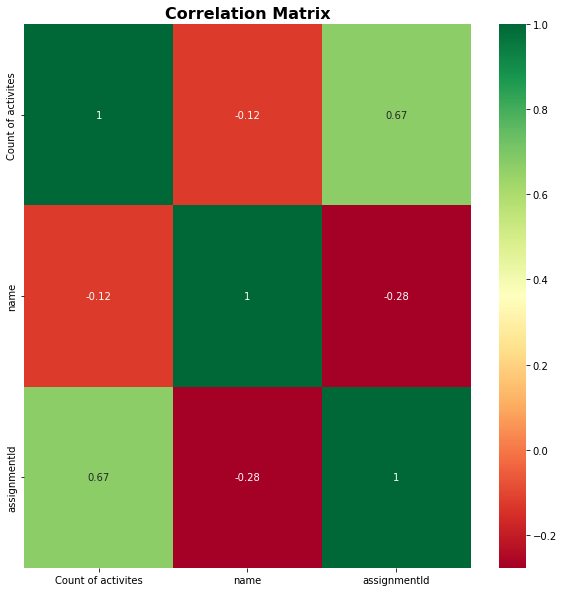

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = results_cert_assignment.corr()
plt.figure(figsize=[10, 10])
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix", fontweight="bold", fontsize=16)
plt.show()

## Recommendations for [Project Function](https://projectfunction.io/)

- Record log out data as timestamp in Activiy Log
- Enforce uniqueness consraint on Assignment submission, overwrite previous submission

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d15e87d-b710-4fff-80ef-ff0e4cb338ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>